In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

#### Leitura do conjunto processado de dados referentes a usinas elétricas no Brasil

In [2]:
df_usinas = pd.read_csv(r"..\Dados tratados\LISTA - USINAS.csv", encoding = "utf-8")
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [3]:
df_usinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       21912 non-null  object 
 1   NomEmpreendimento             21912 non-null  object 
 2   IdeNucleoCEG                  21912 non-null  int64  
 3   CodCEG                        21912 non-null  object 
 4   SigUFPrincipal                21912 non-null  object 
 5   SigTipoGeracao                21912 non-null  object 
 6   DscFaseUsina                  21912 non-null  object 
 7   DscOrigemCombustivel          21912 non-null  object 
 8   DscFonteCombustivel           21912 non-null  object 
 9   DscTipoOutorga                21912 non-null  object 
 10  NomFonteCombustivel           21912 non-null  object 
 11  DatEntradaOperacao            21912 non-null  object 
 12  MdaPotenciaOutorgadaKw        21912 non-null  float64
 13  M

In [4]:
df_usinas = df_usinas[(df_usinas["DscFaseUsina"]=="Operação")]
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [5]:
df_usinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       21912 non-null  object 
 1   NomEmpreendimento             21912 non-null  object 
 2   IdeNucleoCEG                  21912 non-null  int64  
 3   CodCEG                        21912 non-null  object 
 4   SigUFPrincipal                21912 non-null  object 
 5   SigTipoGeracao                21912 non-null  object 
 6   DscFaseUsina                  21912 non-null  object 
 7   DscOrigemCombustivel          21912 non-null  object 
 8   DscFonteCombustivel           21912 non-null  object 
 9   DscTipoOutorga                21912 non-null  object 
 10  NomFonteCombustivel           21912 non-null  object 
 11  DatEntradaOperacao            21912 non-null  object 
 12  MdaPotenciaOutorgadaKw        21912 non-null  float64
 13  M

#### Contagem do número de usinas agrupadas por fonte de energia

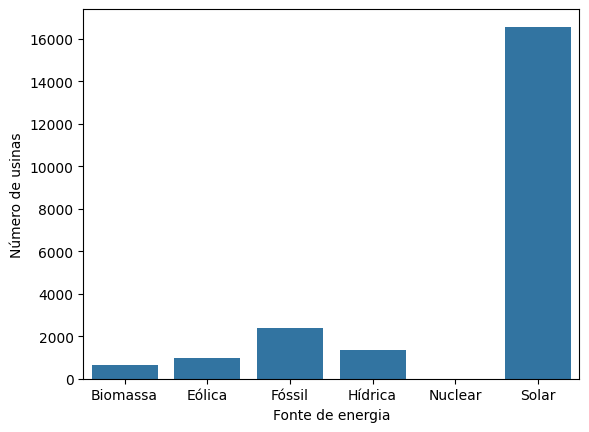

In [6]:
axes = sns.barplot(data=df_usinas.groupby(["DscOrigemCombustivel"]).agg(count=("DscOrigemCombustivel","count")), x="DscOrigemCombustivel", y="count");
axes.set(xlabel = "Fonte de energia", ylabel = "Número de usinas");
plt.ticklabel_format(style='plain', axis='y')

#### Potência outorgada total por tipo de usina

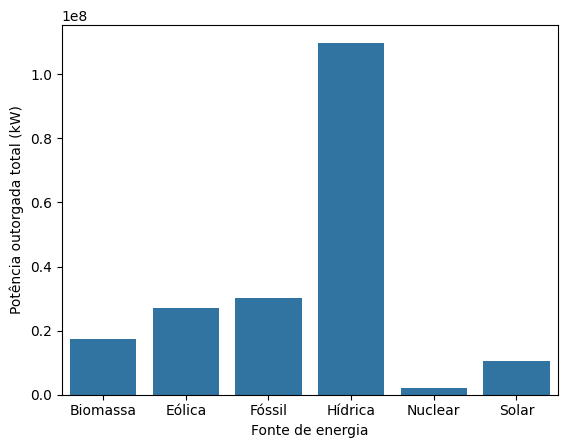

In [7]:
axes = sns.barplot(data=df_usinas.groupby(["DscOrigemCombustivel"]).agg(potencia_outorgada_kw=("MdaPotenciaOutorgadaKw","sum")),
           x="DscOrigemCombustivel",
           y="potencia_outorgada_kw",
           );
axes.set(xlabel = "Fonte de energia", ylabel = "Potência outorgada total (kW)");

#### Visualização da localização das usinas no mapa do Brasil

In [8]:
brasil_map = gpd.read_file(r"..\Dados brutos\IBGE\Shapefiles\BR_UF_2021\BR_UF_2021.shp")

<Axes: >

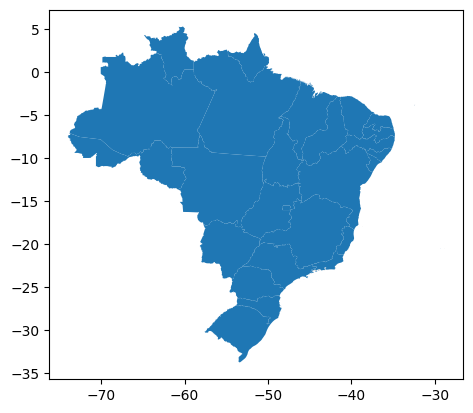

In [9]:
brasil_map.plot()

<Axes: >

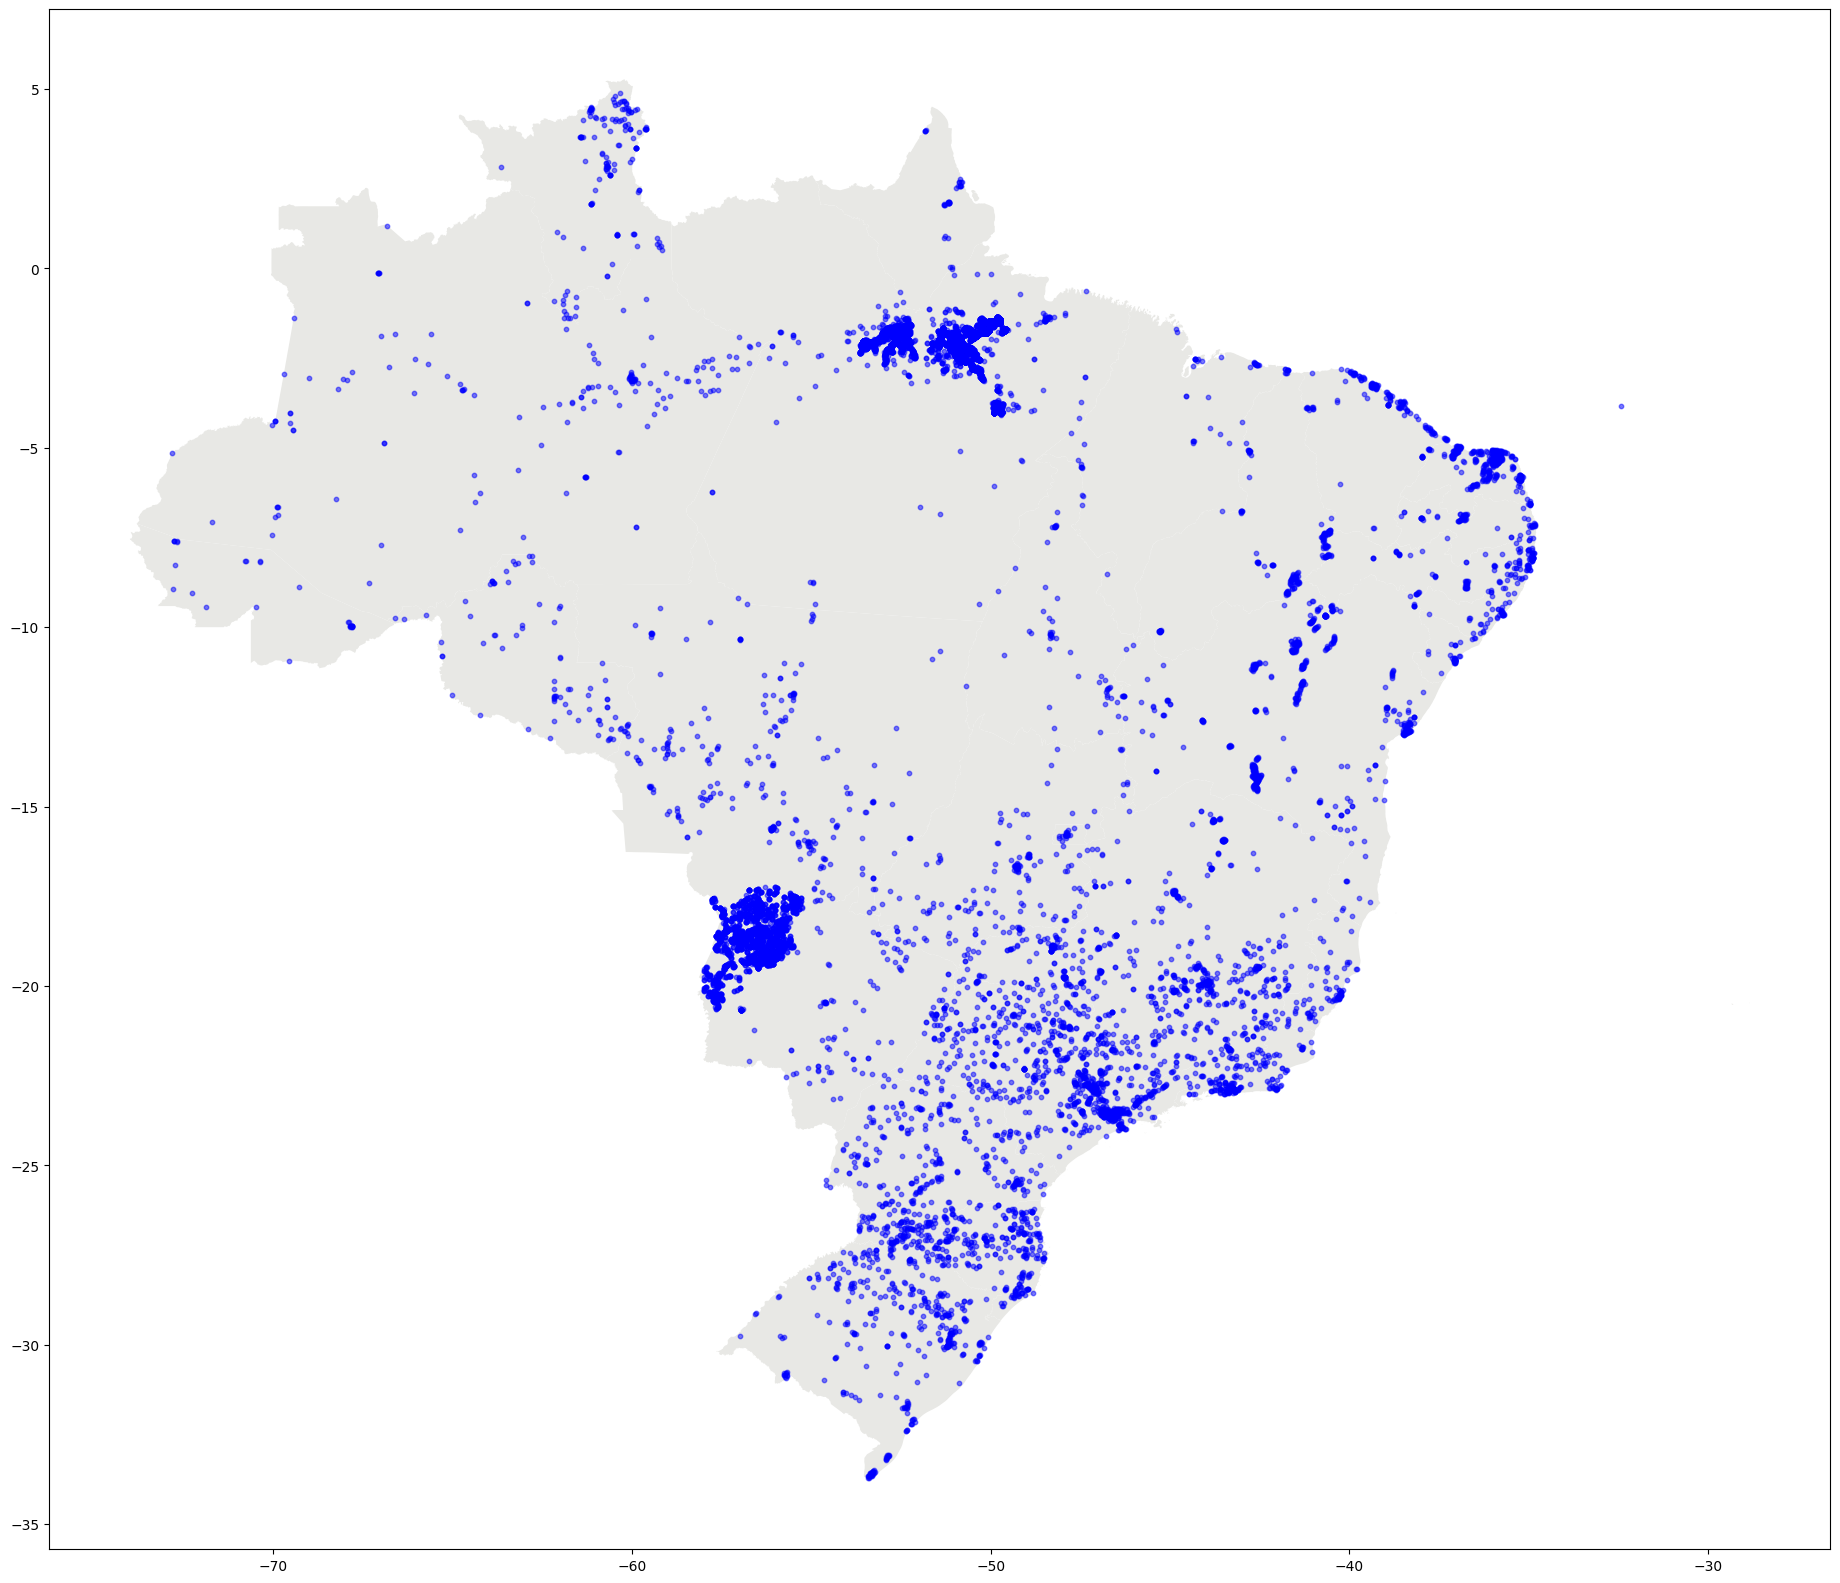

In [10]:
geometria_usinas = [Point(coords) for coords in zip(df_usinas['NumCoordEEmpreendimento'], df_usinas['NumCoordNEmpreendimento'])]
geo_df_usinas = gpd.GeoDataFrame(df_usinas, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_usinas.plot(ax = eixo, markersize = 10, color = "blue", alpha = 0.5)

In [11]:
tipos_de_usina = ["bio_agro","bio_liquido","bio_floresta","bio_animal","bio_residuo",
                  "eolica",
                  "petroleo","carvao","gas","outros_fosseis",
                  "nuclear",
                  "solar",
                  "hidrica"]
rotulos = ["Agroindustriais","Biocombustíveis líquidos","Floresta","Resíduos animais","Resíduos sólidos urbanos",
          "Cinética do vento",
           "Petróleo","Carvão mineral","Gás natural","Outros Fósseis",
           "Urânio",
           "Radiação solar",
           "Potencial hidráulico"]

cores = ["#0aa648", "#0aa648", "#0aa648", "#0aa648", "#0aa648",
        "#ff67f1",
        "#340202", "#340202", "#340202", "#340202",
        "#ad0de2",
        "#ffeb00",
        "#59bfff"]

geo_df_dict = {}
for tipo_de_usina, rotulo, cor in zip(tipos_de_usina, rotulos, cores):
    geo_df_dict[tipo_de_usina]={
        "rotulo":rotulo,
        "filtro":df_usinas[(df_usinas["DscFonteCombustivel"]==rotulo)],
        "cor":cor
    }
    

for key in geo_df_dict.keys():
    filtro = geo_df_dict[key]["filtro"]
    geo_df_dict[key]["geometria"] = [Point(coords) for coords in zip(filtro['NumCoordEEmpreendimento'], filtro['NumCoordNEmpreendimento'])]
    geometria = geo_df_dict[key]["geometria"]
    geo_df_dict[key]["geo_df"] = gpd.GeoDataFrame(filtro, geometry = geometria)

#### Visualização da localização das usinas no mapa do Brasil, coloridas de acordo com a fonte de energia

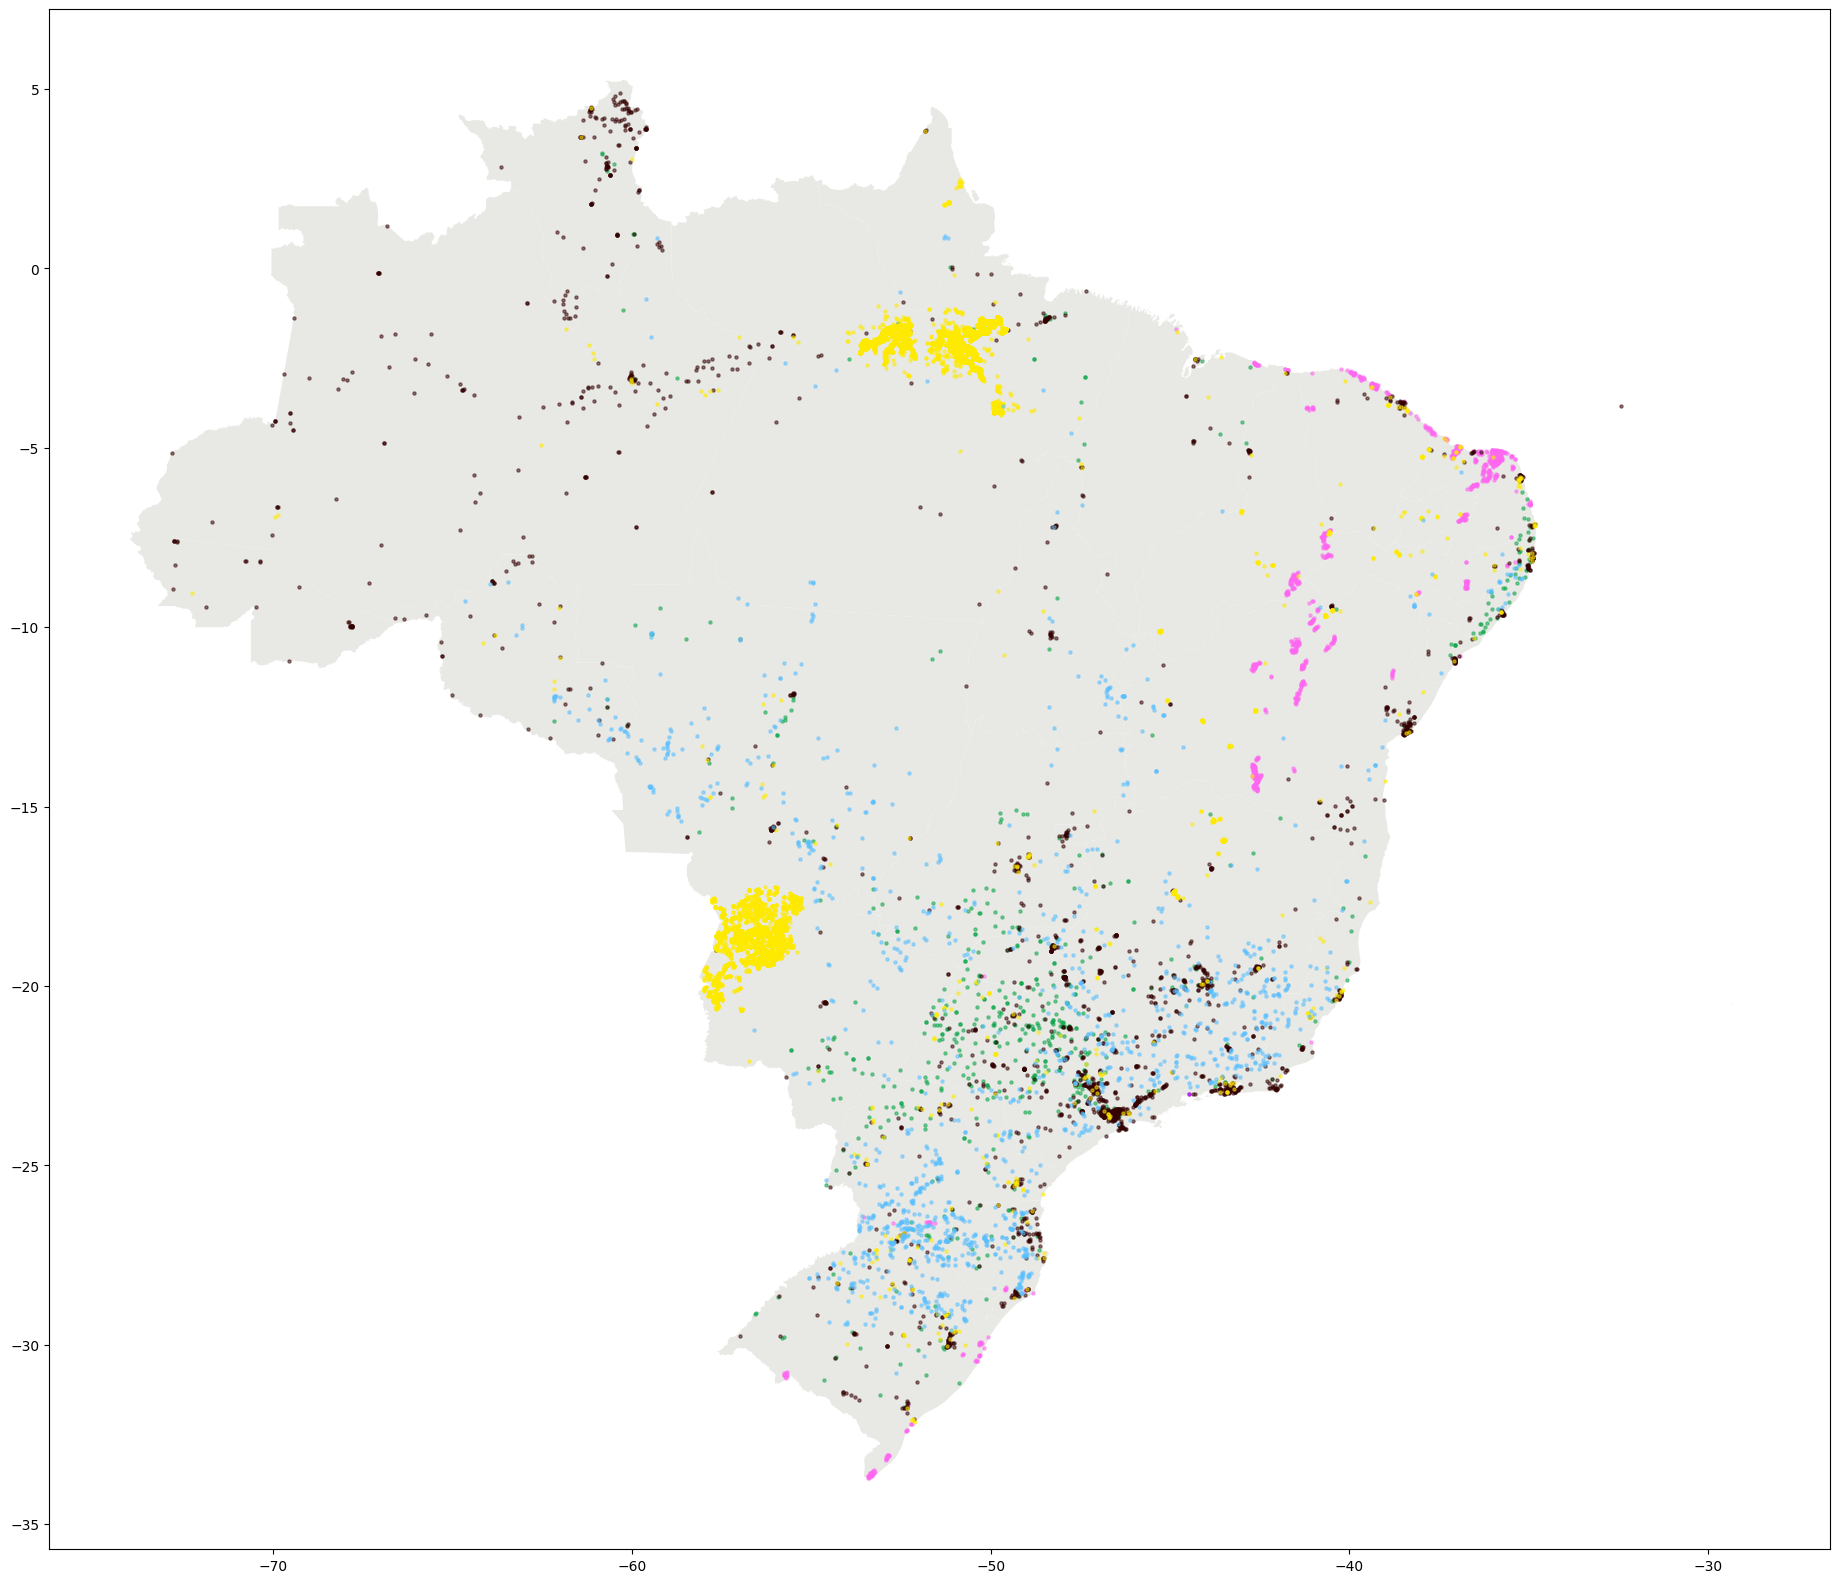

In [12]:
figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
for key in geo_df_dict.keys():
    cor = geo_df_dict[key]["cor"]
    geo_df_dict[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 0.5)

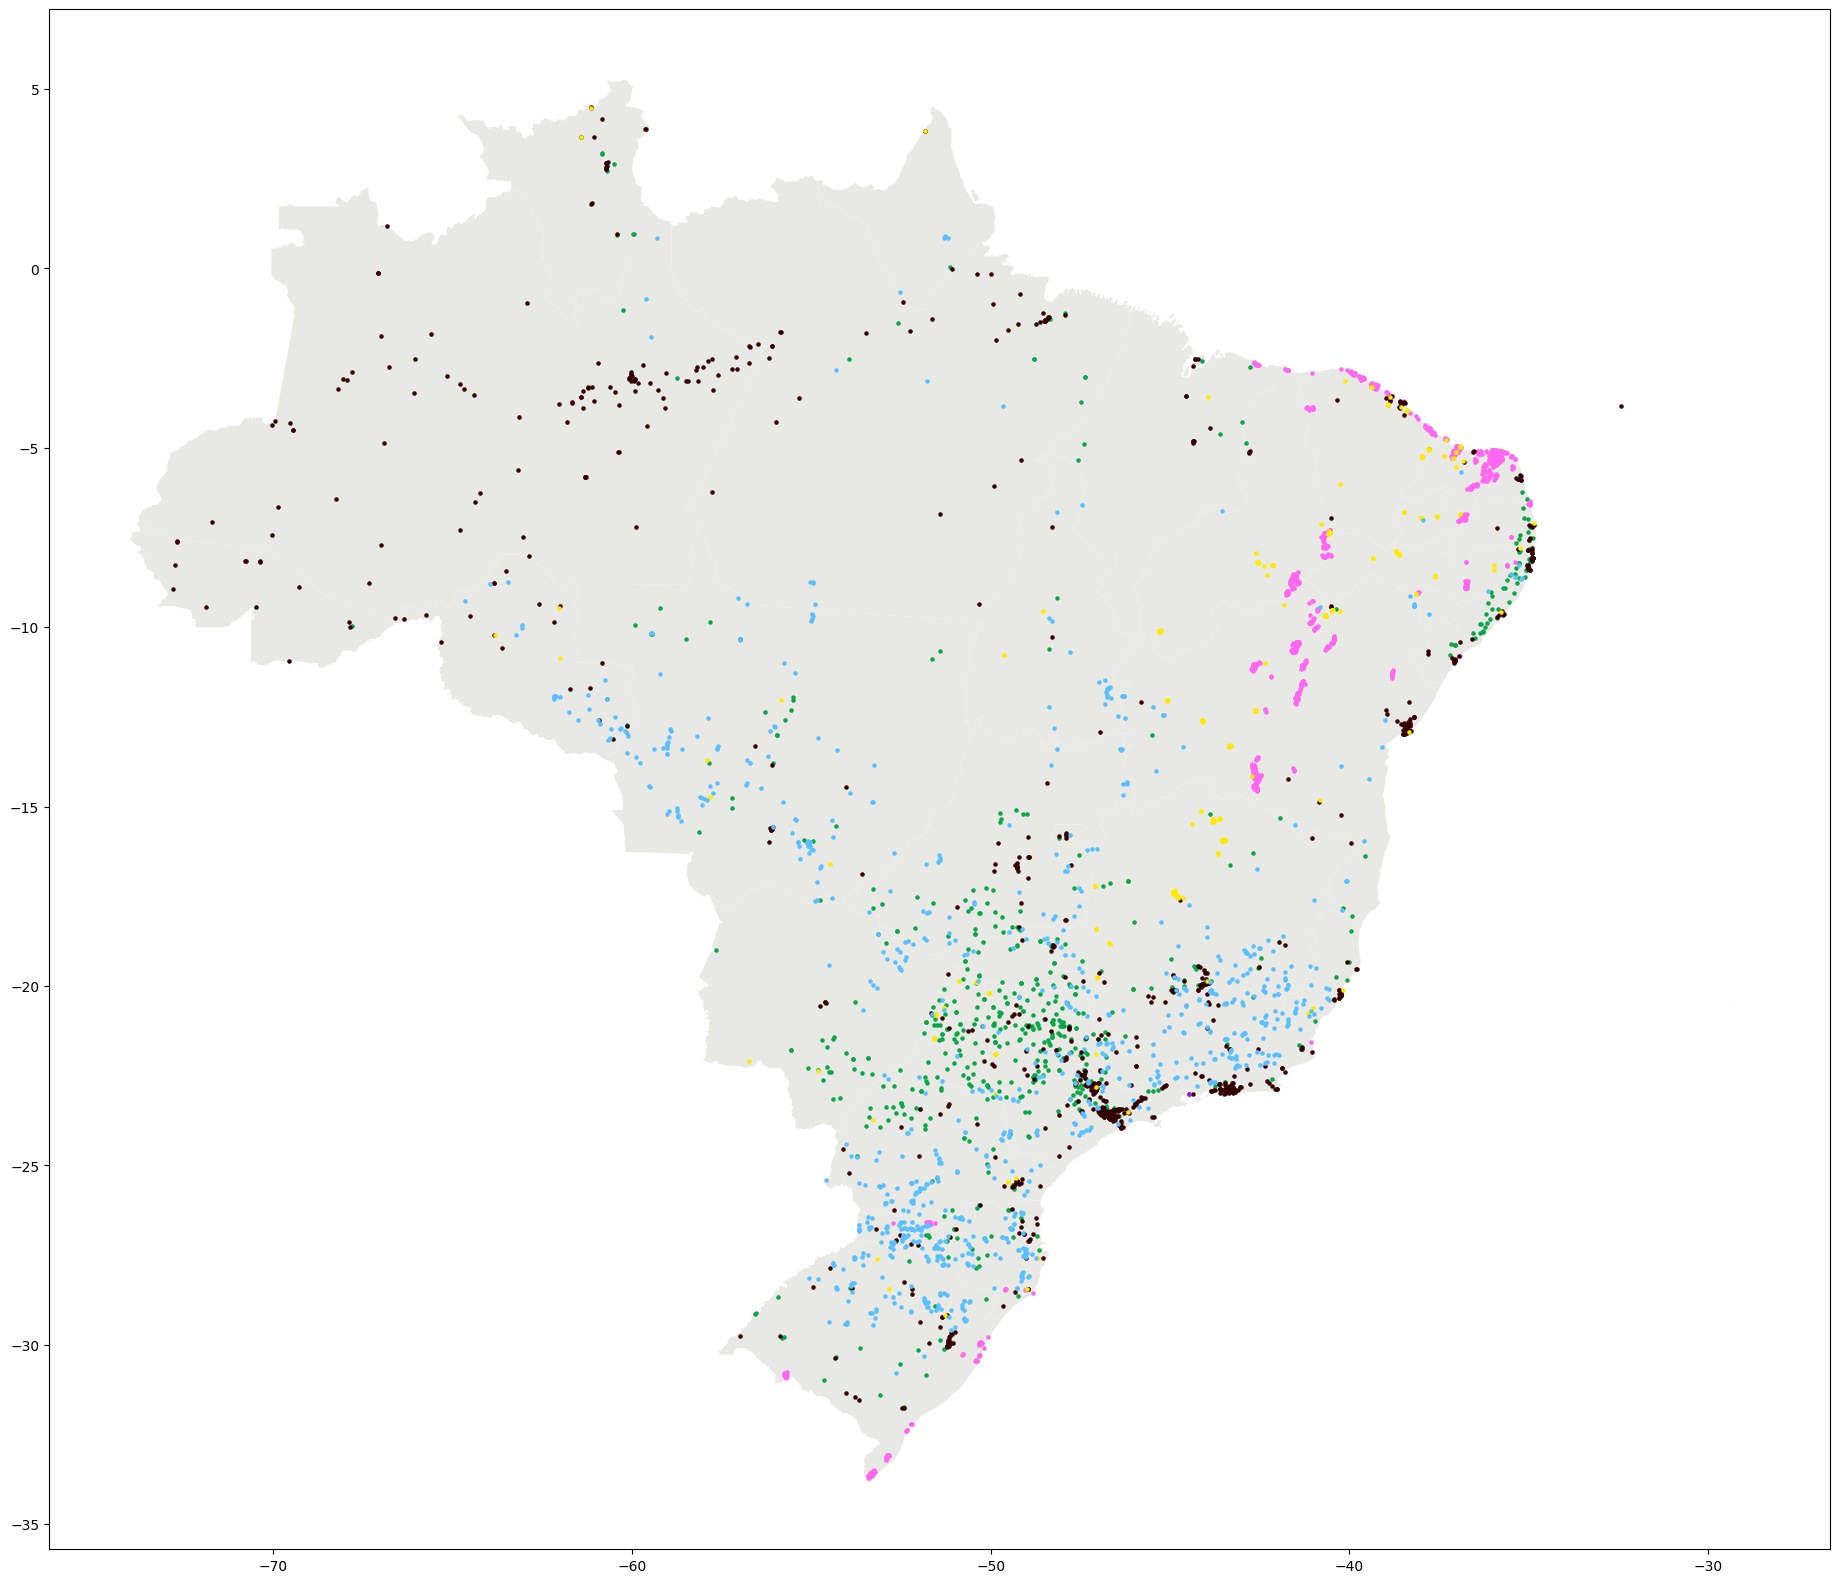

In [13]:
# Selecionando as usinas com potência outorgada maior que 1 MWh
df_usinas_maiores = df_usinas[(df_usinas["MdaPotenciaOutorgadaKw"]>1000)]
    
geo_df_dict_maiores = {}
for tipo_de_usina, rotulo, cor in zip(tipos_de_usina, rotulos, cores):
    geo_df_dict_maiores[tipo_de_usina]={
        "rotulo":rotulo,
        "filtro":df_usinas_maiores[(df_usinas_maiores["DscFonteCombustivel"]==rotulo)],
        "cor":cor
    }
    

for key in geo_df_dict_maiores.keys():
    filtro = geo_df_dict_maiores[key]["filtro"]
    geo_df_dict_maiores[key]["geometria"] = [Point(coords) for coords in zip(filtro['NumCoordEEmpreendimento'], filtro['NumCoordNEmpreendimento'])]
    geometria = geo_df_dict_maiores[key]["geometria"]
    geo_df_dict_maiores[key]["geo_df"] = gpd.GeoDataFrame(filtro, geometry = geometria)
                              

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
for key in geo_df_dict_maiores.keys():
    cor = geo_df_dict_maiores[key]["cor"]
    geo_df_dict_maiores[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 1)